El primer paso será generar los datos realistas a partir de un coeficiente y una variación aleatoria. Para ello, se debe generar un array “x” con los instantes de tiempos (i.e. de 1 a 60, representando los segundos de un minuto) y un array “y” con las frecuencias cardiacas para dichos tiempos. Por ejemplo, podrías usar la siguiente fórmula, pero también es bueno que pruebas con otras fórmulas:
$$y = 0.7 * x + 60 \pm 6$$


In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

#Generamos una secuencia de tiempo de un minuto
x = np.arange(61)
y = 0.7 * x + 60 + np.random.uniform(-5.9, 5.9, len(x))

In [ ]:
def fit_and_plot(x, y, model = LinearRegression()):
    model.fit(x.reshape(-1,1), y.reshape(-1,1))
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    f"Slope={slope:.2f}, Intercept={intercept:.2f}"


    data = pd.DataFrame({'x': x, 'y': y})
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.regplot(x='x', y='y', data=data, line_kws={"color": "red"})
    plt.title('Linear Regression')
    plt.xlabel('X')
    plt.ylabel('Y')

    equation_text = f'$y = 0.7 * x + 60 \pm 5.9$'
    fit_text = r'$\hat{y} =' + f'{slope:.2f}' + ' * x + ' + f'{intercept:2f}$'
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.80, fit_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.show()

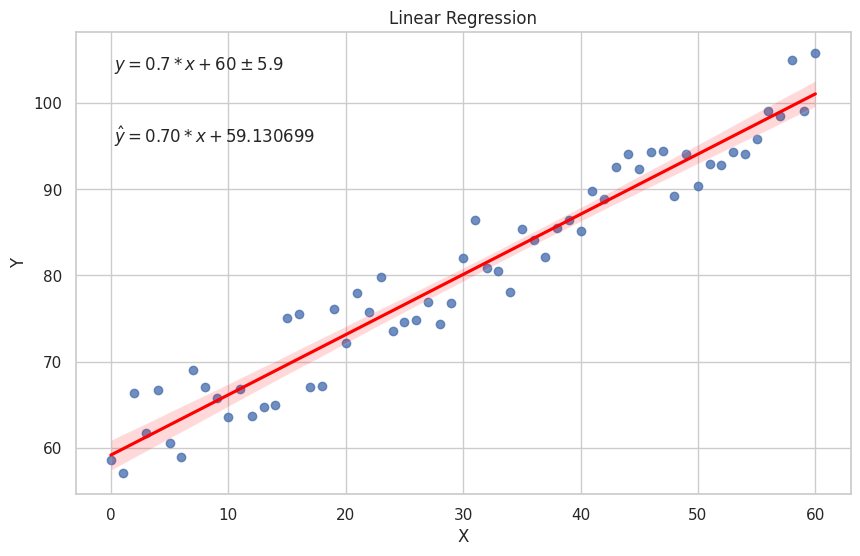

In [48]:
fit_and_plot(x, y)

Es básicamente una implementación de minimos cuadrados y se comporta como se esperaría. No hay mucho que decir, nos facilita el cálculo de un valor si le damos una `x` o una serie de `x` y usamos el método `predict`.

En este caso nos calcula correctamente el valor del intercept teórico (en media el valor aleatorio que sumamos desaparece al tener 0 como media) y el de la pendiente.